In [3]:
import numpy as np
import matplotlib.pyplot as plt
from algorithm import factorize

def get_from_dict(d, values, sep=","):
    return [d[i.strip()] for i in values.split(sep)]

def test_trapezoid(n_samples, topwidth=1, basewidth=1):
    epsilon = (basewidth - topwidth)/2
    intriangles = np.random.rand(n_samples) <= epsilon / (1 + epsilon)
    n_triangles_points =  np.count_nonzero(intriangles)
    n_rectangle_points = n_samples - n_triangles_points
    rectangle_points = np.random.rand(n_rectangle_points, 2)
    rectangle_points[:, 0] -= .5
    triangles_points = np.random.rand(n_triangles_points, 2)
    in_first_triangle = triangles_points[:, 0] <= (1 - triangles_points[:, 1])
    triangles_points[:, 0] *= epsilon
    triangles_points[in_first_triangle, 0]+= .5
    triangles_points[~in_first_triangle, 1] = 1 - triangles_points[~in_first_triangle][:, 1]
    triangles_points[~in_first_triangle, 0] -= epsilon + .5
    samples = np.empty((n_samples, 2))
    samples[intriangles] = triangles_points
    samples[~intriangles] = rectangle_points
    return samples

[==========          ] 50%
Manifolds...
Manifold #1 [1 4 8 9]
Manifold #2 [ 2  5  6 14]


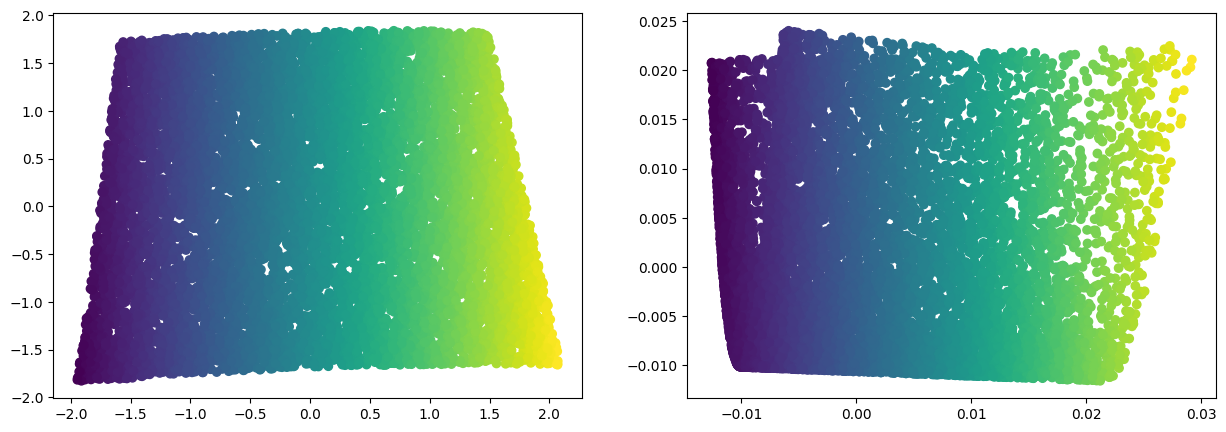

In [5]:
samples = test_trapezoid(10000, basewidth = 1.2)
results = factorize(data=samples, sigma=0.5, n_eigenvectors=20, n_factors=2, eig_crit = 1000,
  sim_crit = 0.7, seed=255)
data, phi, Sigma, best_matches, best_sims, C_matrix, manifolds = \
    get_from_dict(results, "data, phi, Sigma, best_matches, best_sims, C_matrix, manifolds")

plot, axes = plt.subplots(1,2,figsize=(15, 5))
axes[0].scatter(phi[:, manifolds[0][0]], phi[:, manifolds[1][0]], c=phi[:, manifolds[0][0]])
axes[1].scatter(phi[:, manifolds[0][1]], phi[:, manifolds[1][1]], c=phi[:, manifolds[0][1]])

[================    ] 80%
Manifolds...
Manifold #1 [ 1  4  8 13]
Manifold #2 [2 3 5 9]
[================    ] 80%
Manifolds...
Manifold #1 [ 1  4  9 13]
Manifold #2 [ 2  5  6  8 14]
[================    ] 80%
Manifolds...
Manifold #1 [ 1  3  4 11]
Manifold #2 [ 2  5  6  9 13 19]
[================    ] 80%
Manifolds...
Manifold #1 [1 2]
Manifold #2 [ 4  6 10 12 14 17]
[================    ] 80%
Manifolds...
Manifold #1 [ 1  8 12]
Manifold #2 [2 3 5 7]
[================    ] 80%
Manifolds...
Manifold #1 [ 1  8 11 13]
Manifold #2 [ 2  5 10 12 16]


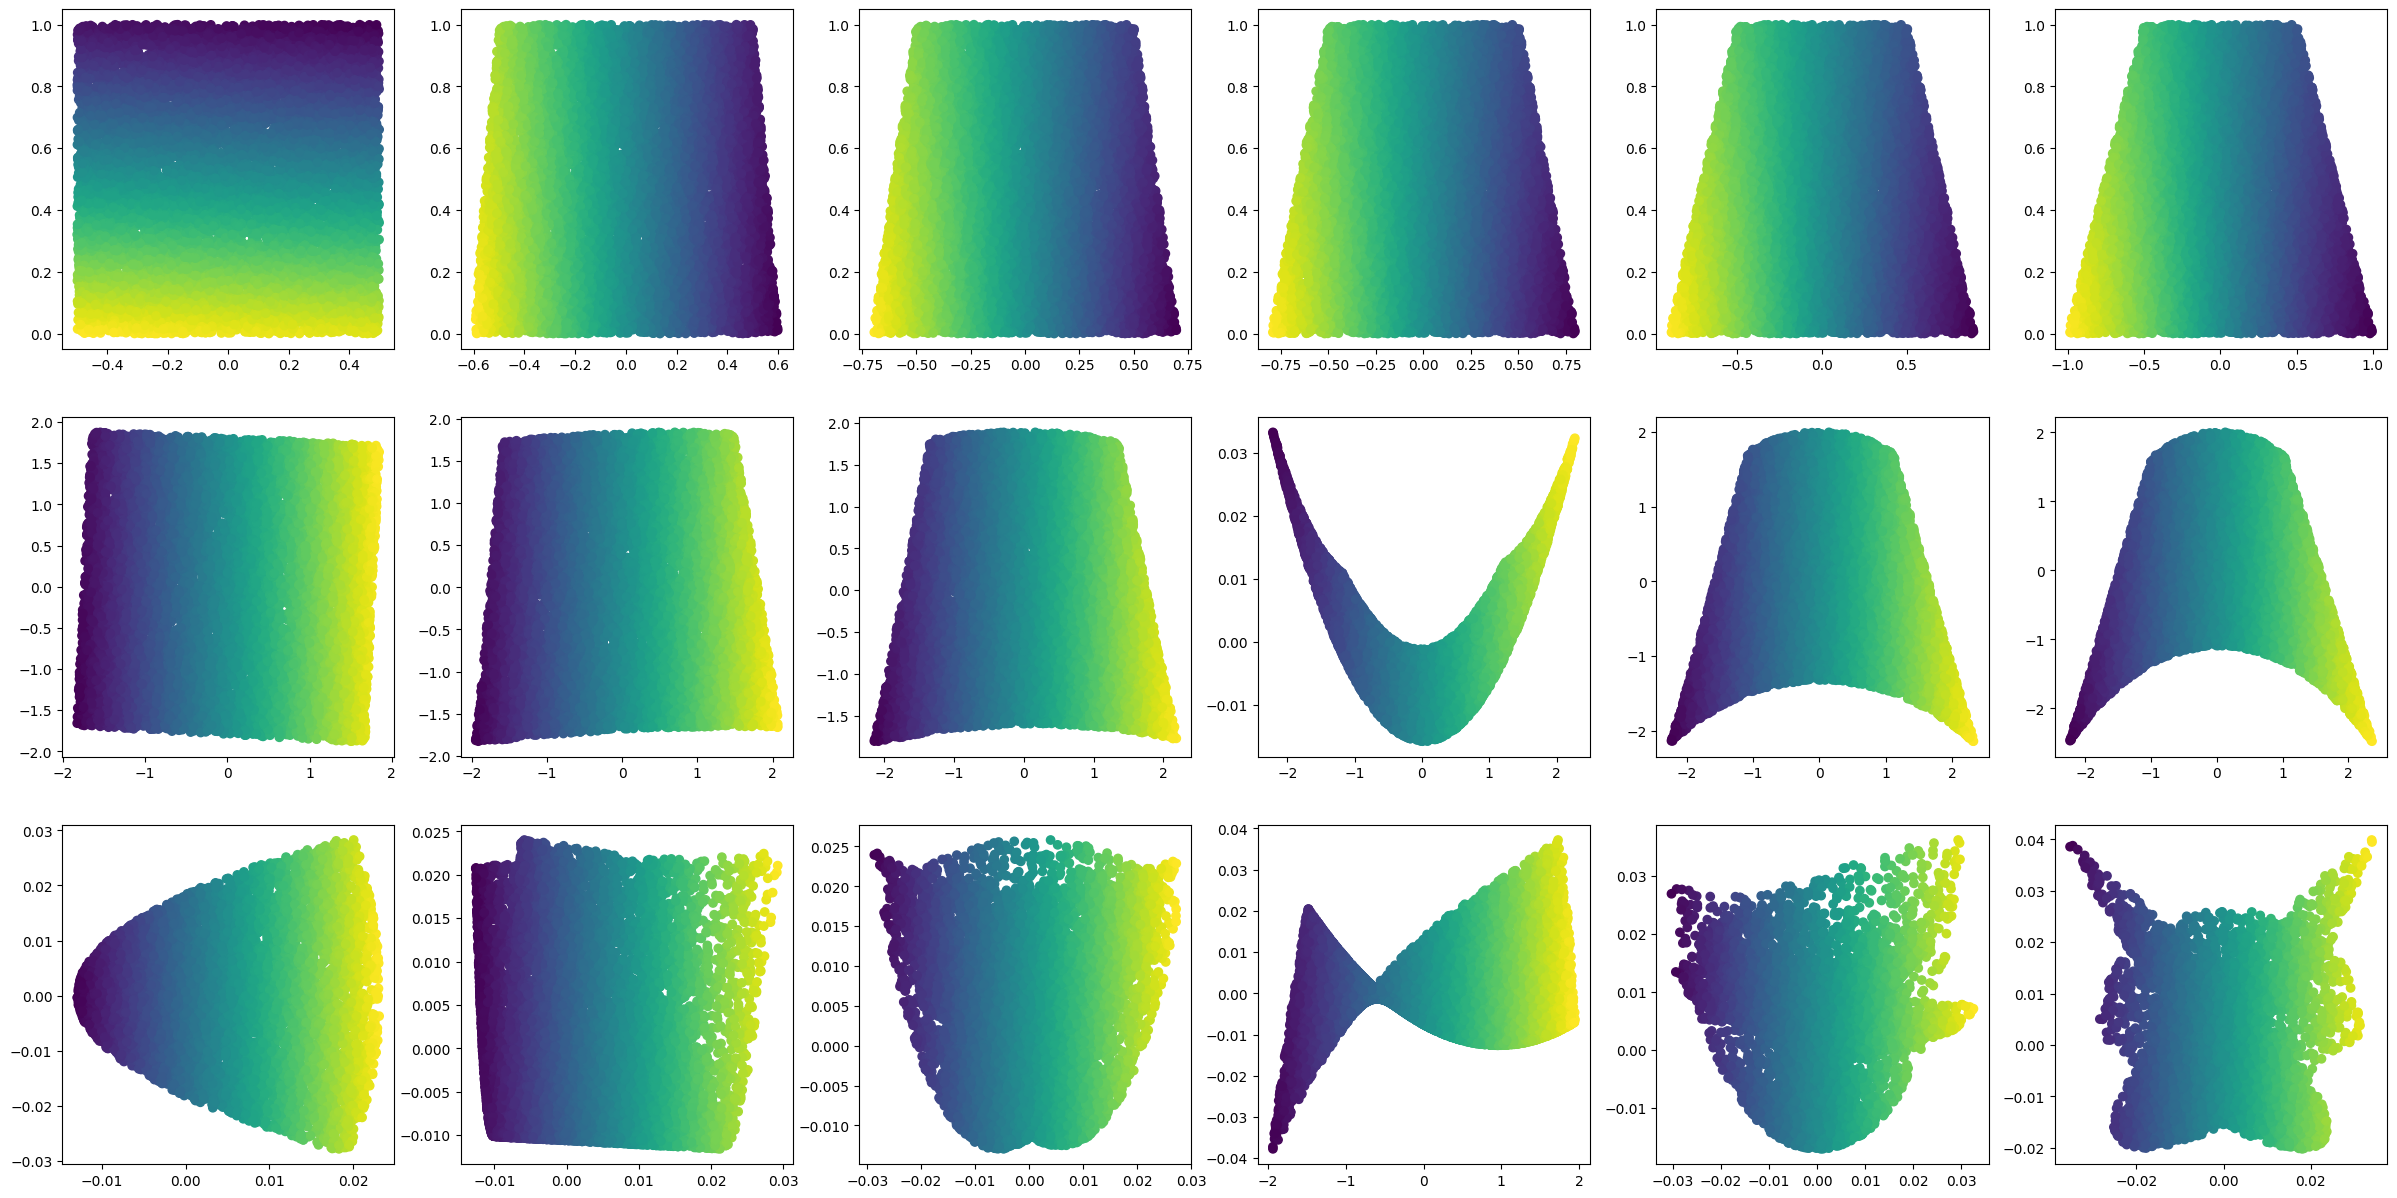

In [8]:
plot, axes = plt.subplots(3,6,figsize=(30, 15))
for i in range(6):
    basewidth = 1+0.2*i
    samples = test_trapezoid(10000, basewidth = basewidth)
    results = factorize(data=samples, sigma=0.5, n_eigenvectors=25, n_factors=2, eig_crit = 1000,
    sim_crit = 0.7, seed=0)
    data, phi, Sigma, best_matches, best_sims, C_matrix, manifolds = \
        get_from_dict(results, "data, phi, Sigma, best_matches, best_sims, C_matrix, manifolds")
    axes[0,i].scatter(data[:, 0], data[:, 1], c=phi[:, manifolds[0][0]])
    axes[1,i].scatter(phi[:, manifolds[0][0]], phi[:, manifolds[1][0]], c=phi[:, manifolds[0][0]])
    axes[2,i].scatter(phi[:, manifolds[0][1]], phi[:, manifolds[1][1]], c=phi[:, manifolds[0][1]])